# The Inverse Transform

## The idea

By drawing from a uniform distribution, it is possible to draw from the other distribution in a question.

$$U[0,1]$$ 

This is the process:

1. get a uniform sample $u$ from $U[0,1]$ -- np.random.rand(1)
1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
1. repeat.

# Draw from the distribution exponential distribution with parameter 1 

$f(x) \sim \exp{(-x)}$

$\begin{equation}
    f(x)=
    \begin{cases}
       e^{- x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$
  

CDF is

$\begin{equation}
    F(x)=
    \begin{cases}
       1 - e^{- x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$
### Following the equation from above

$$ u = F(x) = \int_{0}^{x} e^{-t} dt  = 1- e^{-x} $$ 

Solving for $x$ 
$$ x = - \ln (1-u) $$



/Users/Sarah/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


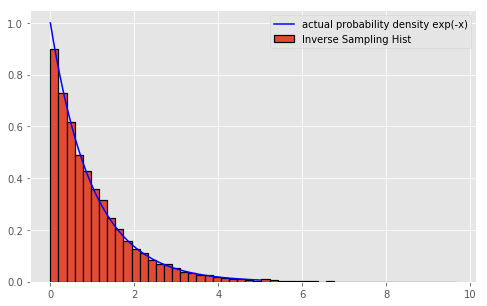

In [9]:
import numpy as np
import matplotlib.pyplot as plt

p = lambda x: np.exp(-x)*(x>0)

CDF = lambda x: (1-np.exp(-x))*(x>0)

invCDF = lambda u: -np.log(1-u)

N = 10000

R = np.random.rand(N)

X = invCDF(R)

plt.figure(figsize=(8,5))

plt.hist(X, bins=50,  normed=1, label=u'Inverse Sampling Hist', 
         edgecolor='black', linewidth=1.2);

xvals=np.linspace(1e-5, 5, 1000)

plt.plot(xvals, p(xvals), 'b', label=u'actual probability density exp(-x)')
plt.style.use('ggplot')

plt.legend()
plt.show()

## From the sampling above, it can use the sample generated to plot:  
## Given $A>0$, 
## $P(X<A) = $ {number of samples < A}/total number of samples



In [10]:
aa = np.linspace(1e-5, 5, 200)

CDFarr = np.zeros(len(aa))

for i in range(0,len(aa)):
    A = aa[i]
    total     = np.sum(X<A)
    prob_A    = total/len(X)
    CDFarr[i] = prob_A

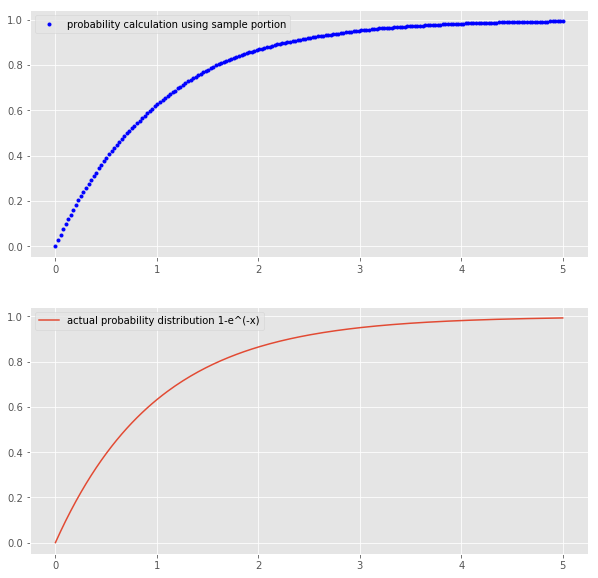

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(aa,CDFarr,'.',color = 'blue',
         label = u'probability calculation using sample portion')
plt.legend()

plt.subplot(212)
plt.plot(aa,CDF(aa),'-',
        label = u'actual probability distribution 1-e^(-x)')
plt.legend()

plt.show()